# Part 1

## Task:
### Imagine you want to summarize some of the most important food cost metrics and trends for economists.
### Provide descriptive statistics of the dataset any way you see fit.
### At minimum, include the following:
 - Calculate cost of living trends such as CPI
 - Find and show plots of any interesting patterns or trends in food costs
 - Include summary tables per country, product, etc.

In [56]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

#### Loading and analysing basic details about the data

In [57]:
df = pd.read_csv('food_prices.csv')
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [58]:
df.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Unit of Measurement',
       'Average Price ', 'Currency ', 'Price in USD', 'Availability ',
       'Quality '],
      dtype='object')

#### Column name sanitization for accessibility

In [59]:
df.columns = df.columns.str.strip()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1200 non-null   object 
 1   Year                 1200 non-null   int64  
 2   Month                1200 non-null   int64  
 3   Food Item            1200 non-null   object 
 4   Unit of Measurement  1200 non-null   object 
 5   Average Price        1200 non-null   float64
 6   Currency             1200 non-null   object 
 7   Price in USD         1200 non-null   float64
 8   Availability         1200 non-null   int64  
 9   Quality              1200 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.9+ KB


In [61]:
df.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


#### I excluded the ‘Availability’ column from the analysis because it contains a constant value (1.0) and lacks informational value.

In [62]:
df.drop(columns=['Availability'], inplace=True)

#### Checking for Null values

In [63]:
df.isnull().sum()

Country                0
Year                   0
Month                  0
Food Item              0
Unit of Measurement    0
Average Price          0
Currency               0
Price in USD           0
Quality                0
dtype: int64

#### Parse and create a sorted DateTime column

In [64]:
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))
df.sort_values(by=["Country", "Date"], inplace=True)
df.head(10)

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Quality,Date
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,High,2018-01-01
60,Australia,2018,1,Milk,1 L,1.22,AUD,0.82,High,2018-01-01
120,Australia,2018,1,Eggs,Carton of 12,3.10,AUD,2.08,High,2018-01-01
180,Australia,2018,1,Potatoes,1 Kg,3.25,AUD,2.18,High,2018-01-01
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,High,2018-02-01
61,Australia,2018,2,Milk,1 L,1.23,AUD,0.83,High,2018-02-01
121,Australia,2018,2,Eggs,Carton of 12,3.12,AUD,2.09,High,2018-02-01
181,Australia,2018,2,Potatoes,1 Kg,3.25,AUD,2.18,High,2018-02-01
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,High,2018-03-01
62,Australia,2018,3,Milk,1 L,1.24,AUD,0.83,High,2018-03-01


### Summary Tables

In [65]:
country_group = df.groupby(['Country', 'Food Item'])
country_group['Price in USD'].describe()

count      mean       std   min     25%    50%  \
Country      Food Item                                                   
Australia    Bread       60.0  1.643667  0.146206  1.47  1.5275  1.600   
             Eggs        60.0  2.647667  0.603258  2.08  2.2075  2.335   
             Milk        60.0  1.003167  0.117956  0.82  0.9075  0.980   
             Potatoes    60.0  2.407833  0.174230  2.18  2.2275  2.425   
Canada       Bread       60.0  2.313500  0.083073  2.18  2.2475  2.310   
             Eggs        60.0  3.026167  0.100391  2.88  2.9500  3.010   
             Milk        60.0  1.954500  0.070481  1.84  1.9000  1.945   
             Potatoes    60.0  2.276667  0.075905  2.16  2.2200  2.260   
Japan        Bread       60.0  1.404667  0.039508  1.34  1.3800  1.400   
             Eggs        60.0  1.715167  0.096559  1.60  1.6200  1.705   
             Milk        60.0  1.375333  0.019955  1.34  1.3600  1.380   
             Potatoes    60.0  2.764167  0.134949  2.59  2.6275  2.760   
South Africa Bread       60.0  0.775000  0.050135  0.69  0.7375  0.770   
             Eggs        60.0  1.564167  0.088170  1.43  1.4800  1.565   
             Milk        60.0  0.848500  0.048602  0.78  0.8100  0.840   
             Potatoes    60.0  0.955000  0.062123  0.87  0.8900  0.960   
Sweden       Bread       60.0  2.087833  0.195770  1.82  1.9250  2.060   
             Eggs        60.0  2.922000  0.281466  2.56  2.6450  2.915   
             Milk        60.0  1.168167  0.109490  1.00  1.0775  1.160   
             Potatoes    60.0  1.183667  0.086396  1.09  1.1200  1.150   

                           75%   max  
Country      Food Item                
Australia    Bread      1.7450  1.96  
             Eggs       3.0600  4.03  
             Milk       1.1150  1.19  
             Potatoes   2.5200  2.77  
Canada       Bread      2.3725  2.48  
             Eggs       3.0925  3.25  
             Milk       2.0025  2.10  
             Potatoes   2.3225  2.45  
Japan        Bread      1.4100  1.52  
             Eggs       1.7925  1.90  
             Milk       1.3900  1.42  
             Potatoes   2.8625  3.03  
South Africa Bread      0.8100  0.88  
             Eggs       1.6325  1.72  
             Milk       0.8825  0.95  
             Potatoes   1.0025  1.07  
Sweden       Bread      2.2050  2.53  
             Eggs       3.1250  3.49  
             Milk       1.2425  1.39  
             Potatoes   1.2325  1.39

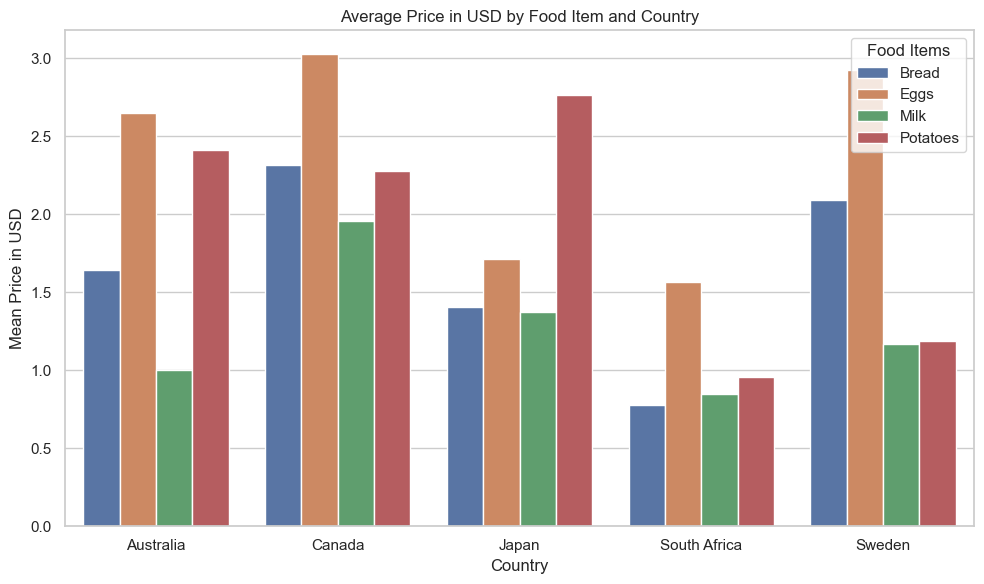

In [66]:
country_mean_plot_data = country_group['Price in USD'].mean().reset_index()
# reset_index() is used since seaborn requires the data to be a column and not index for plotting

plt.figure(figsize=(10, 6))
sns.barplot(data=country_mean_plot_data, x='Country', y='Price in USD', hue='Food Item')

plt.title('Average Price in USD by Food Item and Country')
plt.ylabel('Mean Price in USD')
plt.xlabel('Country')
plt.legend(title='Food Items')
plt.tight_layout()
plt.show()

#### Observations from the table:
- South Africa has the lowest average price for all food items.
- Canada has is the most expensive for all food items, except potatoes, which is the most expensive in Japan.
- In all countries, except Japan, eggs are the most expensive food item.
- Milk is the cheapest food item in all recorded countries.

### Food Price Charts
#### USD prices are used instead of local currencies to normalize data across countries

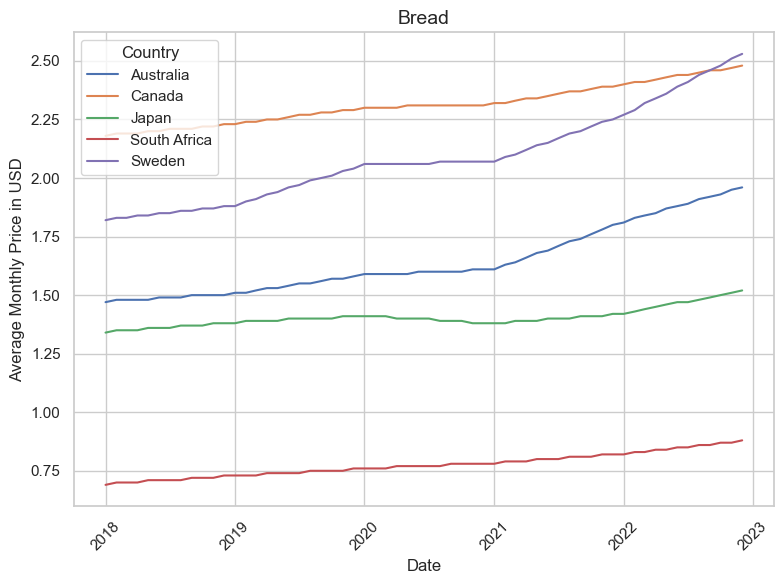

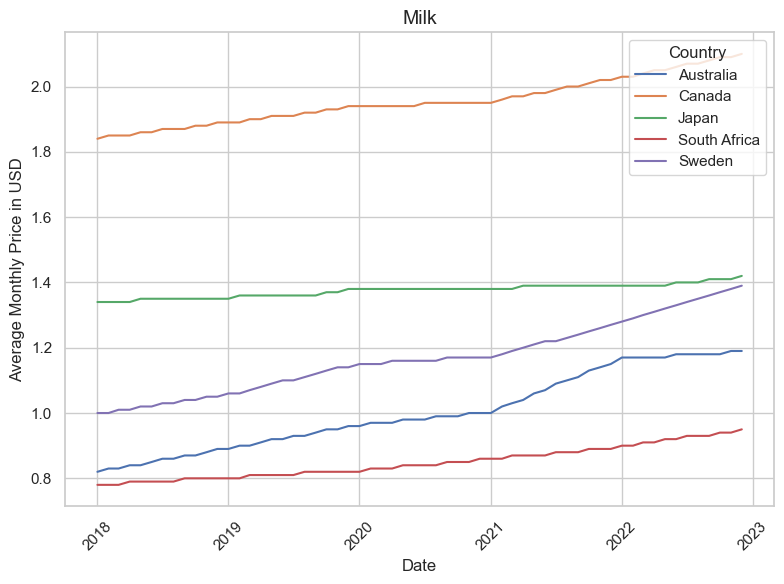

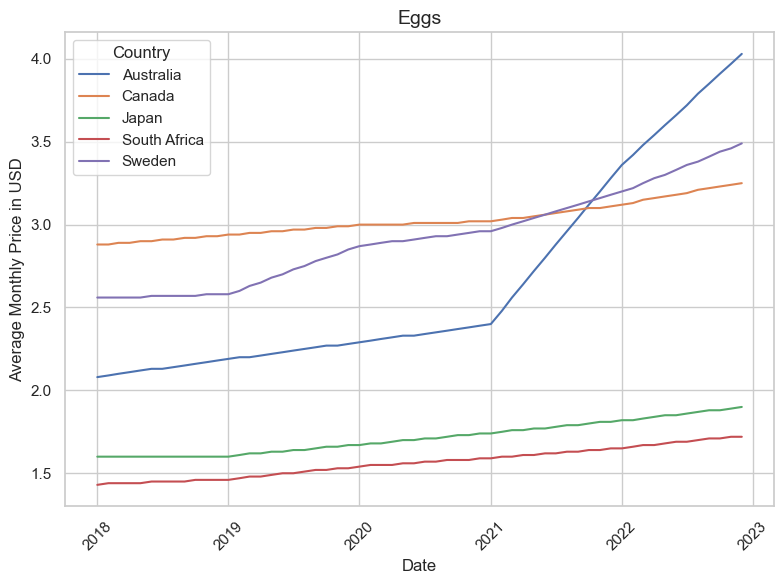

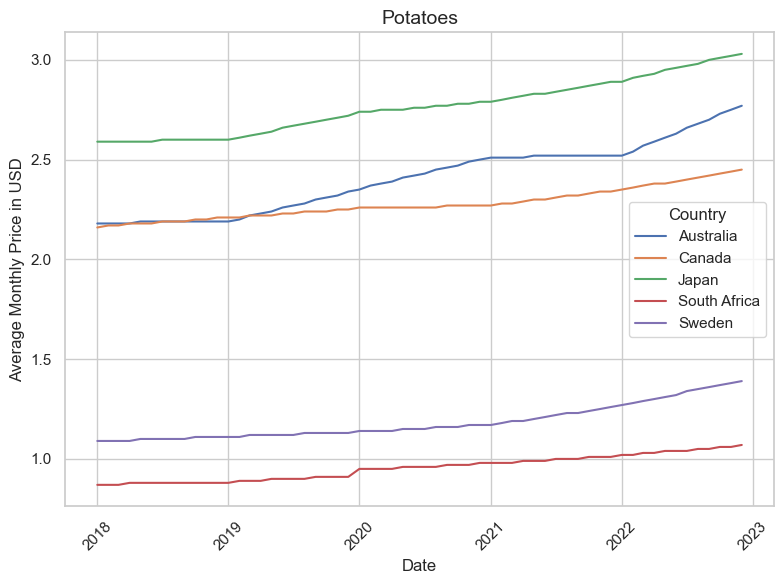

In [67]:
food_items = df['Food Item'].unique()
df.reset_index(inplace=True) # Since seaborn wants date as a column, not index

for item in food_items:
    plt.figure(figsize=(8, 6))
    subset = df[df['Food Item'] == item]
    
    sns.lineplot(data=subset, x='Date', y='Price in USD', hue='Country')
    
    plt.title(f'{item}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Average Monthly Price in USD')
    plt.xticks(rotation=45)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()


#### Observations from the charts:
- No major change in average food prices is seen in South Africa and Japan -- prices have steadily increased.
- Australia and Canada had similar price for potatoes up until 2019, after which prices increased at a higher rate in Australia and has been up increasing since.
- Egg prices in Australia have sky-rocketed since 2021 -- prices have doubled since then.

### CPI
#### Considering simple mean as the CPI for each country (a more accurate version might be to take the weighted mean based on the usage rates of each item, as done while calculating actual CPI)

In [68]:
monthly_avg = df.groupby(['Country', 'Year', 'Month'])['Average Price']
# monthly_avg.get_group(('Australia', 2020, 10))
monthly_avg = monthly_avg.mean() # Mean price per month
monthly_avg

Country    Year  Month
Australia  2018  1         2.4425
                 2         2.4500
                 3         2.4550
                 4         2.4650
                 5         2.4700
                           ...   
Sweden     2022  8        21.7175
                 9        21.9025
                 10       22.0850
                 11       22.2700
                 12       22.4525
Name: Average Price, Length: 300, dtype: float64

In [69]:
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ['country', 'year', 'month', 'avg_price']
monthly_avg_df['date'] = pd.to_datetime(monthly_avg_df[['year', 'month']].assign(day=1))
monthly_avg_df.sort_values(by=['country', 'date'], inplace=True)
monthly_avg_df

,country,year,month,avg_price,date
0,Australia,2018,1,2.4425,2018-01-01
1,Australia,2018,2,2.4500,2018-02-01
2,Australia,2018,3,2.4550,2018-03-01
3,Australia,2018,4,2.4650,2018-04-01
4,Australia,2018,5,2.4700,2018-05-01
...,...,...,...,...,...
295,Sweden,2022,8,21.7175,2022-08-01
296,Sweden,2022,9,21.9025,2022-09-01
297,Sweden,2022,10,22.0850,2022-10-01
298,Sweden,2022,11,22.2700,2022-11-01


#### Normalized CPI with base year 2018 = 100 -- helps us observe the relative scale of change in CPI.

In [71]:
base_2018 = monthly_avg_df[monthly_avg_df['year'] == 2018].groupby('country')['avg_price'].mean()
base_2018

country
Australia         2.480208
Canada            3.012708
Japan           239.826250
South Africa     17.326667
Sweden           16.686042
Name: avg_price, dtype: float64

In [72]:
monthly_avg_df['base_2018'] = monthly_avg_df['country'].map(base_2018)
monthly_avg_df

,country,year,month,avg_price,date,base_2018
0,Australia,2018,1,2.4425,2018-01-01,2.480208
1,Australia,2018,2,2.4500,2018-02-01,2.480208
2,Australia,2018,3,2.4550,2018-03-01,2.480208
3,Australia,2018,4,2.4650,2018-04-01,2.480208
4,Australia,2018,5,2.4700,2018-05-01,2.480208
...,...,...,...,...,...,...
295,Sweden,2022,8,21.7175,2022-08-01,16.686042
296,Sweden,2022,9,21.9025,2022-09-01,16.686042
297,Sweden,2022,10,22.0850,2022-10-01,16.686042
298,Sweden,2022,11,22.2700,2022-11-01,16.686042


In [ ]:
monthly_avg_df['normalized_cpi'] = monthly_avg_df['avg_price'] / monthly_avg_df['base_2018']
monthly_avg_df

,country,year,month,avg_price,date,base_2018,normalized_cpi
0,Australia,2018,1,2.4425,2018-01-01,2.480208,0.984796
1,Australia,2018,2,2.4500,2018-02-01,2.480208,0.987820
2,Australia,2018,3,2.4550,2018-03-01,2.480208,0.989836
3,Australia,2018,4,2.4650,2018-04-01,2.480208,0.993868
4,Australia,2018,5,2.4700,2018-05-01,2.480208,0.995884
...,...,...,...,...,...,...,...
295,Sweden,2022,8,21.7175,2022-08-01,16.686042,1.301537
296,Sweden,2022,9,21.9025,2022-09-01,16.686042,1.312624
297,Sweden,2022,10,22.0850,2022-10-01,16.686042,1.323561
298,Sweden,2022,11,22.2700,2022-11-01,16.686042,1.334648


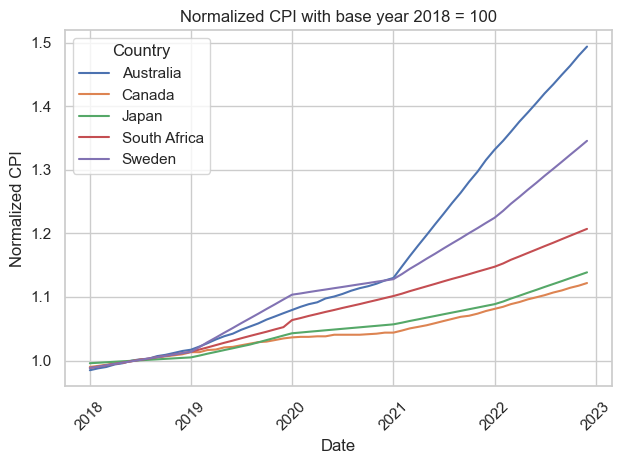

In [74]:
sns.lineplot(data=monthly_avg_df, x='date', y='normalized_cpi', hue='country')
plt.title('Normalized CPI with base year 2018 = 100')
plt.xlabel('Date')
plt.ylabel('Normalized CPI')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

#### Observations:
- Canada, South Africa, and Japan were fairly stable for the period.
- Sweden's rate increased drastically in 2021.
- Australia saw a drastic increase in 2021, following which, it overtook Sweden.

# Part 2

## Task:
### Assume there is no cost (transportation, taxes, fees, etc.) to instantaneously buying goods in one country and selling them in another country any given year.
- Join in a dataset on currency exchange rates with the vital food costs dataset.
- Write an algorithm that takes any given year's data as input, and returns all potential arbitrage opportunities within that year factoring in currency exchange rates i.e. a list of tuples of strings [(buy USA bread USD 8.17, sell Argentina bread USD 10.23), (buy China milk USD 2.25, sell Japan milk USD 2.84) ..... ]
- This list should not contain any duplicates

#### Since the dataset already contains price in USD, joining a currency exchange rate dataset is not necessary.

In [75]:
df.columns

Index(['index', 'Country', 'Year', 'Month', 'Food Item', 'Unit of Measurement',
       'Average Price', 'Currency', 'Price in USD', 'Quality', 'Date'],
      dtype='object')